In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
df = pd.read_excel("data_new/train.xlsx", sheet_name="negative_pressure")

dt = pd.read_excel("data_new/test.xlsx", sheet_name="negative_pressure")


In [3]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['Status'] = LE.fit_transform(df['Status'])
dt['Status'] = LE.fit_transform(dt['Status'])

df

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5,-0.235991
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6,-0.201731
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7,-0.178508
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8,-0.155312
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9,-0.140151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36,-0.043038
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37,-0.045629
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38,-0.046404
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39,-0.046004


In [4]:
dt.iloc[30:50,:]

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
30,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,35,-0.024911
31,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,36,-0.023293
32,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,37,-0.022821
33,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,38,-0.022314
34,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,39,-0.021763
35,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,40,-0.021158
36,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,5,-0.211949
37,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,6,-0.176115
38,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,7,-0.169283
39,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,8,-0.150481


In [5]:
X_traindf = df.drop(['ID','Target'], axis=1)
X_testdf = dt.drop(['ID','Target'], axis=1)

X_traindf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5
1,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6
2,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7
3,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8
4,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
21595,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36
21596,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37
21597,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38
21598,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39


In [6]:
y_train = df['Target']
y_train

0       -0.235991
1       -0.201731
2       -0.178508
3       -0.155312
4       -0.140151
           ...   
21595   -0.043038
21596   -0.045629
21597   -0.046404
21598   -0.046004
21599   -0.044897
Name: Target, Length: 21600, dtype: float64

In [7]:
y_test = dt['Target']

y_test

0      -0.113256
1      -0.103320
2      -0.094337
3      -0.085396
4      -0.075286
          ...   
7195   -0.057054
7196   -0.055646
7197   -0.054091
7198   -0.052357
7199   -0.050474
Name: Target, Length: 7200, dtype: float64

___

# Standardization and Power Transform

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [9]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [10]:
quantile = QuantileTransformer(output_distribution='normal', random_state=42)



y_train_normal = quantile.fit_transform(y_train.values.reshape(-1,1))
y_test_normal = quantile.transform(y_test.values.reshape(-1,1))


/home/tendou/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tendou/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


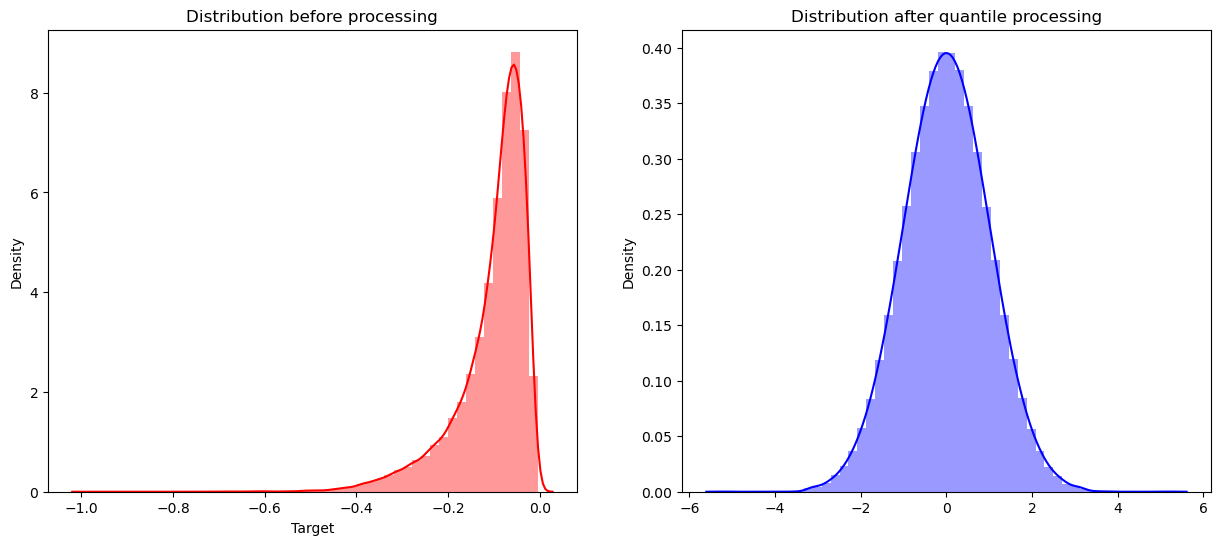

In [11]:
# Visualize the effect of power transformation
f = plt.figure(figsize=(15, 6))

ax = f.add_subplot(121)
sns.distplot(y_train, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(122)
sns.distplot(y_train_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after quantile processing')
print()

___

# ANN

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled
torch.manual_seed(0)

In [13]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y_train_torch = torch.from_numpy(y_train_normal.astype(np.float32))
y_test_torch = torch.from_numpy(y_test_normal.astype(np.float32))

print(X_train_torch)

tensor([[-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.6846],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.5883],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.4921],
        ...,
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.4921],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.5883],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.6846]])


In [14]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y_train_torch[i]
                     ])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y_test_torch[i]
                     ])
   
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=0, shuffle=True)                                                                   # Increasing num_workers slow down the training because it does not use GPU at all
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=0)

In [15]:
for data, target in train_loader:
    print(data.shape[0] == data.size(0))
    break

True


In [16]:
## Define the NN architecture
## NN with 3 hidden layer, s=[11, 256, 256, 256, 1]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The final layer has 1 output neuron
        self.fc4 = nn.Linear(256, 1)


        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add final output layers:
        output = self.fc4(x)
       
        return output

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (mish): Mish()
)


In [17]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [18]:
startTime = timeit.default_timer() 

n_epochs = 500 

model.to(device)    # bring the model to gpu

train_losses = []
lowest_mape = 100
for epoch in range(n_epochs):

    model.train()       

    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, target = data.to(device), target.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))
    

    ############################
    # Evaluate the lowest MAPE #
    ############################
    model.eval()
    with torch.no_grad():  # turn off gradient to save memory
        y_predNN_torch = model(X_test_torch.to(device))

    y_predNN = quantile.inverse_transform(y_predNN_torch.cpu().numpy())
    MAPE = mean_absolute_percentage_error(y_test, y_predNN)

    if MAPE < lowest_mape:
        lowest_mape = MAPE
        print(f'Lowest MAPE: {lowest_mape}')
        torch.save(model.state_dict(), 'PyTorch_Model/Single_NegativePressure_lowest.pt')
    print()

endTime = timeit.default_timer()
runningTotal = (endTime - startTime)
print(f"Time taken: {runningTotal}")

Epoch: 1/500 	Training Loss: 0.057903
Lowest MAPE: 0.10370302725318332

Epoch: 2/500 	Training Loss: 0.017566
Lowest MAPE: 0.1002742921122754

Epoch: 3/500 	Training Loss: 0.015175
Lowest MAPE: 0.08972081367962101

Epoch: 4/500 	Training Loss: 0.013436
Lowest MAPE: 0.0711070408426572

Epoch: 5/500 	Training Loss: 0.013148

Epoch: 6/500 	Training Loss: 0.013229

Epoch: 7/500 	Training Loss: 0.010585

Epoch: 8/500 	Training Loss: 0.009906

Epoch: 9/500 	Training Loss: 0.009388
Lowest MAPE: 0.06330039864939069

Epoch: 10/500 	Training Loss: 0.009395

Epoch: 11/500 	Training Loss: 0.009660

Epoch: 12/500 	Training Loss: 0.009388

Epoch: 13/500 	Training Loss: 0.008832

Epoch: 14/500 	Training Loss: 0.009203
Lowest MAPE: 0.06254034292664125

Epoch: 15/500 	Training Loss: 0.008232

Epoch: 16/500 	Training Loss: 0.008166

Epoch: 17/500 	Training Loss: 0.009544

Epoch: 18/500 	Training Loss: 0.007849
Lowest MAPE: 0.059668426504838376

Epoch: 19/500 	Training Loss: 0.007772

Epoch: 20/500 	Trai

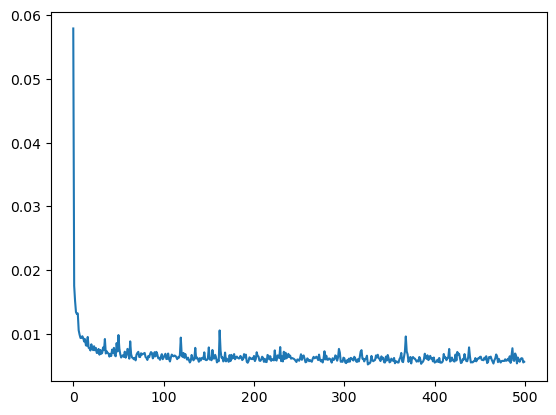

In [19]:
plt.plot(train_losses)

In [20]:
model.load_state_dict(torch.load('PyTorch_Model/Single_NegativePressure_lowest.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y_predNN_torch = model(X_test_torch.to(device))

y_predNN_normal = y_predNN_torch.cpu().numpy()     # convert to numpy array
y_test_normal = y_test_torch.cpu().numpy()



print(y_predNN_normal)

[[-0.5533104 ]
 [-0.39687794]
 [-0.25324613]
 ...
 [ 0.6168848 ]
 [ 0.662985  ]
 [ 0.7072348 ]]


In [21]:
mape = mean_absolute_percentage_error(y_test_normal, y_predNN_normal)
r2 = r2_score(y_test_normal, y_predNN_normal)
rmse = np.sqrt(mean_squared_error(y_test_normal, y_predNN_normal))
print(f"Scores in normal distribution: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in normal distribution: r2 = 0.9891593336890274, mape = 0.48212647438049316, rmse = 0.10548397153615952


In [22]:
y_predNN = quantile.inverse_transform(y_predNN_normal)
mape = mean_absolute_percentage_error(y_test, y_predNN)
r2 = r2_score(y_test, y_predNN)
rmse = np.sqrt(mean_squared_error(y_test, y_predNN))


print(f"Scores in actual distribution for negative pressure")
print('r2:', r2*100)
print('mape:', mape*100)
print('rmse:', rmse)
print()

Scores in actual distribution for negative duration
r2: 99.19063381101138
mape: 5.406329908566442
rmse: 0.007055739816662644

